In [1]:
##############################################################################
## Open CV sample using colorspace transformation: 
## http://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
##############################################################################


In [2]:
import os
import scipy.misc 

import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print flags

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR

In [45]:
input_file = 'E:\\SigTuple_Hack\\Train_Data\\train-8.jpg'

img = cv2.imread(input_file)

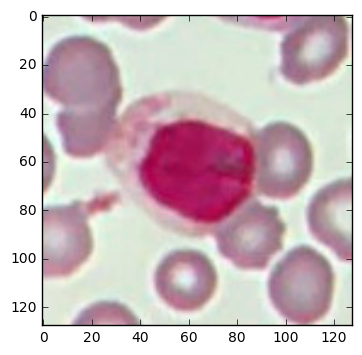

In [46]:
plt.imshow(img)

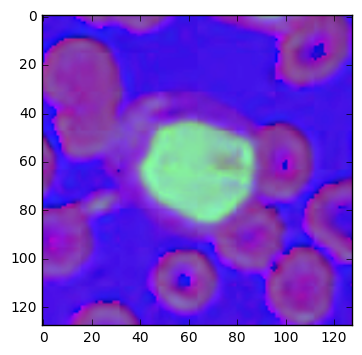

In [47]:
# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [48]:
# define range of blue color in HSV
lower_wbc = np.array([120,240,150])
upper_wbc = np.array([135,255,180])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_wbc, upper_wbc)

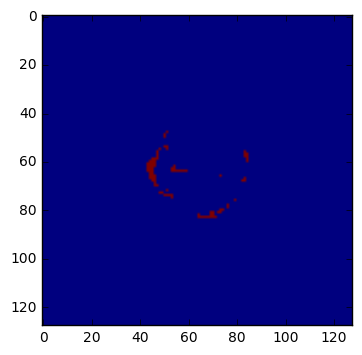

In [49]:
plt.imshow(mask)

In [50]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(hsv,hsv, mask= mask)

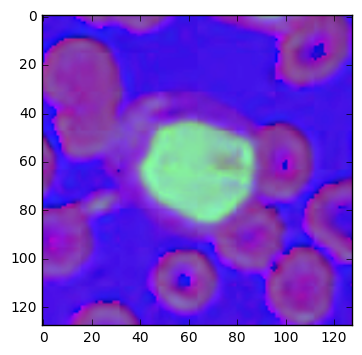

In [51]:
plt.imshow(hsv)


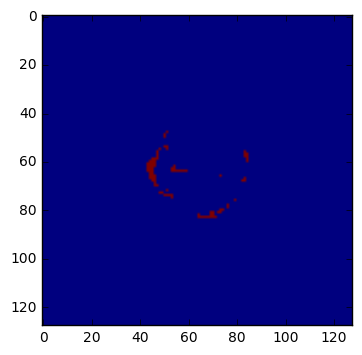

In [52]:
plt.imshow(mask)


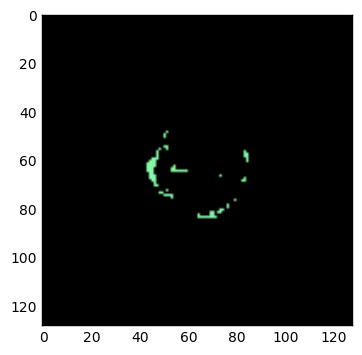

In [53]:
plt.imshow(res)

In [55]:
import os
import scipy.misc 
ip_files = []
train_files = os.listdir('E:\\SigTuple_Hack\\Test_Data')
ip_files += [f for f in train_files if f.endswith('.jpg') and 'mask' not in f]
#ip_files += [f for f in train_files if f.endswith('.jpg') ]
#ip_files

for img_file in ip_files:
    input_file = 'E:\\SigTuple_Hack\\Test_Data\\' + img_file
    mask_file =  'E:\\SigTuple_Hack\\Test_Data\\Mask\\' + img_file[:-4] + '-mask.jpg'
    #mask_file =  'E:\\SigTuple_Hack\\Test_Data\\BackUp_Masks\\' + img_file[:-9] + '-mask2.jpg'
    
    img = cv2.imread(input_file)
    #plt.imshow(img)
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_wbc = np.array([120,240,150])
    upper_wbc = np.array([135,255,180])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_wbc, upper_wbc)
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(hsv,hsv, mask= mask)
     
    # save the mask
    scipy.misc.imsave(mask_file, res)